In [772]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import sklearn.metrics as sm
import math
from sklearn.metrics import r2_score
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [773]:
data = pd.read_csv("crop.csv")

In [774]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [775]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
# data['State_Name'] = labelencoder.fit_transform(data['State_Name'])
# data['District_Name'] = labelencoder.fit_transform(data['District_Name'])
# data['Crop'] = labelencoder.fit_transform(data['Crop'])
data['label'] = labelencoder.fit_transform(data['label'])
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20


In [776]:
data = data.astype(float)

In [777]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90.0,42.0,43.0,20.879744,82.002744,6.502985,202.935536,20.0
1,85.0,58.0,41.0,21.770462,80.319644,7.038096,226.655537,20.0
2,60.0,55.0,44.0,23.004459,82.320763,7.840207,263.964248,20.0
3,74.0,35.0,40.0,26.491096,80.158363,6.980401,242.864034,20.0
4,78.0,42.0,42.0,20.130175,81.604873,7.628473,262.717340,20.0


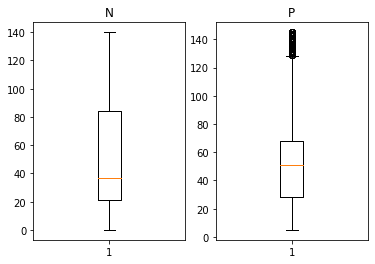

In [778]:
# data = data[data['Production'].notna()]
from matplotlib import pyplot as plt
import numpy as np

plt.subplot(1, 2, 1) 
plt.title("N")
plt.boxplot(data['N'])
 
plt.subplot(1, 2, 2) 
plt.title("P")
plt.boxplot(data['P'])
 
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f5caf7e6be0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5caf7f41c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5caf7e6910>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5caf7f4760>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5caf7f4a30>],
 'means': []}

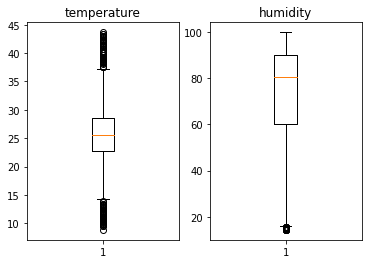

In [779]:
plt.subplot(1, 2, 1) 
plt.title("temperature")
plt.boxplot(data['temperature'])

plt.subplot(1, 2, 2) 
plt.title("humidity")
plt.boxplot(data['humidity'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f5cad09b790>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5cad09bd30>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5cad09b4c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5cad0a71f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5cad0a74c0>],
 'means': []}

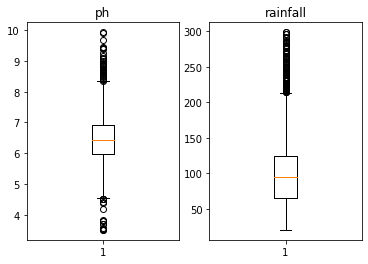

In [780]:
plt.subplot(1, 2, 1) 
plt.title("ph")
plt.boxplot(data['ph'])

plt.subplot(1, 2, 2) 
plt.title("rainfall")
plt.boxplot(data['rainfall'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f5cb12e77c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5cb12e7d60>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5cb12e74f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5cad040340>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5cad040610>],
 'means': []}

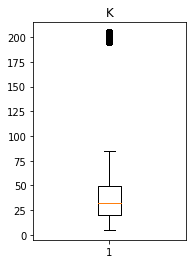

In [781]:
plt.subplot(1, 2, 1) 
plt.title("K")
plt.boxplot(data['K'])

In [782]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.stats.mstats import winsorize

data['P']= winsorize(data['P'],(0.05,0.05))
data['temperature']= winsorize(data['temperature'],(0.05,0.05))
data['humidity']= winsorize(data['humidity'],(0.05,0.05))
data['rainfall']= winsorize(data['rainfall'],(0.05,0.05))
data['K']= winsorize(data['K'],(0.05,0.05))
data['ph']= winsorize(data['ph'],(0.05,0.05))

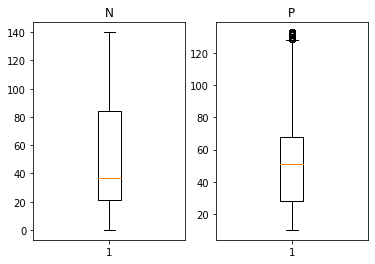

In [783]:
from matplotlib import pyplot as plt
import numpy as np

plt.subplot(1, 2, 1) 
plt.title("N")
plt.boxplot(data['N'])
plt.subplot(1, 2, 2) 
plt.title("P")
plt.boxplot(data['P'])
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f5cac723b50>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5cac733130>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5cac723880>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5cac7336d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5cac7339a0>],
 'means': []}

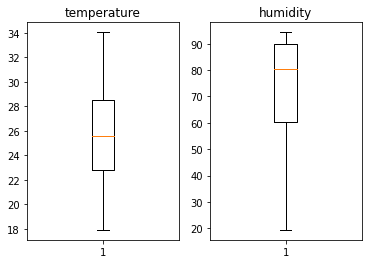

In [784]:
plt.subplot(1, 2, 1) 
plt.title("temperature")
plt.boxplot(data['temperature'])

plt.subplot(1, 2, 2) 
plt.title("humidity")
plt.boxplot(data['humidity'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f5cac5fe2e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5cac5fe7f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5cac66dfd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5cac5fed90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5cac60c0a0>],
 'means': []}

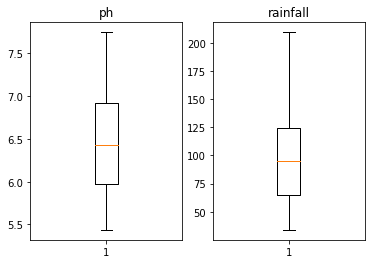

In [785]:
plt.subplot(1, 2, 1) 
plt.title("ph")
plt.boxplot(data['ph'])

plt.subplot(1, 2, 2) 
plt.title("rainfall")
plt.boxplot(data['rainfall'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f5cac5ecaf0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5cac5fa0d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5cac5ec820>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5cac5fa670>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5cac5fa940>],
 'means': []}

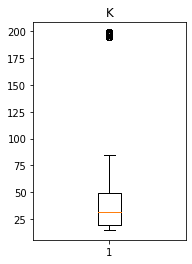

In [786]:
plt.subplot(1, 2, 1) 
plt.title("K")
plt.boxplot(data['K'])

In [788]:
data = data.sort_values(by=['label'])

In [789]:
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

In [790]:
trainX = []
trainY = []

n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 10  # Number of past days we want to use to predict the future.

#Reformat input data into a shape: (n_samples x timesteps x n_features)
#In my example, my df_for_training_scaled has a shape (12823, 5)
#12823 refers to the number of data points and 5 refers to the columns (multi-variables).
for i in range(n_past, len(data_scaled) - n_future +1):
    trainX.append(data_scaled[i - n_past:i, 0:data_scaled.shape[1]-1])
    trainY.append(data_scaled[i + n_future - 1:i + n_future, 7])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (2190, 10, 7).
trainY shape == (2190, 1).


In [793]:
trainX.shape[1]

10

In [794]:
# sgd = tf.keras.optimizers.SGD(learning_rate=0.001)
# model = Sequential()
# model.add(LSTM(50,activation='relu',input_shape=(trainX.shape[1], trainX.shape[2])))
# model.add(Dropout(0.2))
# model.add(Dense(1))
# model.compile(loss='mean_squared_error', optimizer= sgd ,metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [795]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_29 (LSTM)              (None, 10, 64)            18432     
                                                                 
 lstm_30 (LSTM)              (None, 32)                12416     
                                                                 
 dropout_22 (Dropout)        (None, 32)                0         
                                                                 
 dense_28 (Dense)            (None, 1)                 33        
                                                                 
Total params: 30,881
Trainable params: 30,881
Non-trainable params: 0
_________________________________________________________________


In [796]:
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

In [797]:
history = model.fit(trainX, trainY, epochs=100, batch_size=16, validation_split=0.2, verbose=2)

Epoch 1/100
110/110 - 5s - loss: 0.0646 - root_mean_squared_error: 0.2542 - val_loss: 0.2478 - val_root_mean_squared_error: 0.4978 - 5s/epoch - 45ms/step
Epoch 2/100
110/110 - 2s - loss: 0.0227 - root_mean_squared_error: 0.1507 - val_loss: 0.1920 - val_root_mean_squared_error: 0.4382 - 2s/epoch - 19ms/step
Epoch 3/100
110/110 - 2s - loss: 0.0131 - root_mean_squared_error: 0.1146 - val_loss: 0.1083 - val_root_mean_squared_error: 0.3291 - 2s/epoch - 16ms/step
Epoch 4/100
110/110 - 1s - loss: 0.0067 - root_mean_squared_error: 0.0819 - val_loss: 0.1875 - val_root_mean_squared_error: 0.4330 - 1s/epoch - 14ms/step
Epoch 5/100
110/110 - 1s - loss: 0.0060 - root_mean_squared_error: 0.0776 - val_loss: 0.1500 - val_root_mean_squared_error: 0.3873 - 1s/epoch - 13ms/step
Epoch 6/100
110/110 - 1s - loss: 0.0050 - root_mean_squared_error: 0.0708 - val_loss: 0.1471 - val_root_mean_squared_error: 0.3835 - 1s/epoch - 13ms/step
Epoch 7/100
110/110 - 2s - loss: 0.0046 - root_mean_squared_error: 0.0675 - 

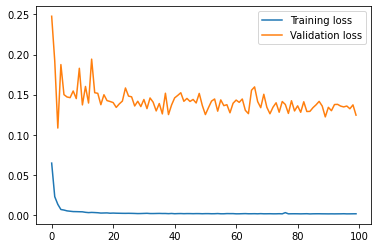

In [799]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [800]:
train_predict = model.predict(trainX)

69/69 [==============================] - 1s 7ms/step


In [804]:
trainY = np.repeat(trainY, data_scaled.shape[1], axis=-1)
trainY_scaler = scaler.inverse_transform(trainY)[:,0]
#train original

In [805]:
train_predict_new = np.repeat(train_predict, data_scaled.shape[1], axis=-1)
train_predict_scaler = scaler.inverse_transform(train_predict_new)[:,0]
#train prediction

In [806]:
neg_nos = [num for num in train_predict_scaler if num < 0]
neg_nos

[]

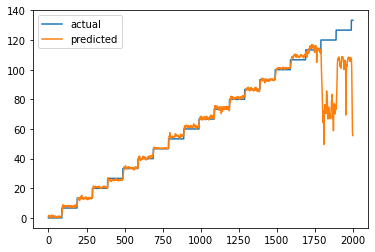

In [807]:
plt.plot(trainY_scaler[1:2000], label="actual")
plt.plot(train_predict_scaler[1:2000], label="predicted")
plt.legend()
plt.show()

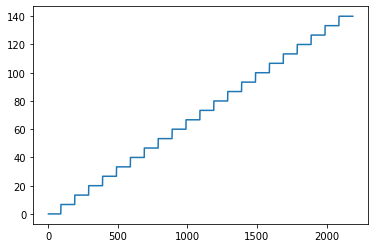

In [808]:
plt.plot(trainY_scaler, label="actual")

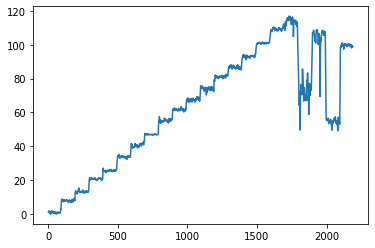

In [809]:
plt.plot(train_predict_scaler, label="predicted")

In [810]:
print("train data") 
print("R2 score =", r2_score(trainY_scaler,train_predict_scaler))

train data
R2 score = 0.7242710856280934


In [811]:
MSE = np.square(np.subtract(trainY_scaler,train_predict_scaler)).mean()   
   
rsme = math.sqrt(MSE)  
print("Root Mean Square Error:\n")  
print(rsme)  

Root Mean Square Error:

22.12019936008653


In [812]:
val_results = pd.DataFrame(data={'Val Predictions':train_predict_scaler, 'Actuals':trainY_scaler})
val_results

,Val Predictions,Actuals
0,1.495607,0.0
1,1.083761,0.0
2,1.139637,0.0
3,1.665855,0.0
4,1.466877,0.0
...,...,...
2185,98.935875,140.0
2186,98.470581,140.0
2187,98.476639,140.0
2188,98.776306,140.0


In [813]:
res = np.array(trainY_scaler) 
unique_res = np.unique(res) 
print("Unique elements of the list using numpy.unique():\n")
print(unique_res)

Unique elements of the list using numpy.unique():

[  0.           6.66666667  13.33333333  20.          26.66666667
  33.33333333  40.          46.66666667  53.33333333  60.
  66.66666667  73.33333333  80.          86.66666667  93.33333333
 100.         106.66666667 113.33333333 120.         126.66666667
 133.33333333 140.        ]


In [814]:
new_predicetd = []
for j in train_predict_scaler:
  temp = []
  for k in unique_res:
    diff = j - k
    diff = int(abs(diff))
    temp.append(diff)
  value = min(temp)
  ind = temp.index(value)
  new_predicetd.append(unique_res[ind])

In [815]:
print("train data") 
print("R2 score =", r2_score(trainY_scaler,new_predicetd))

train data
R2 score = 0.7181918443438347


In [816]:
len(new_predicetd)

2190

In [817]:
val_results = pd.DataFrame(data={'Val Predictions':new_predicetd, 'Actuals':trainY_scaler})
val_results

,Val Predictions,Actuals
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
2185,100.0,140.0
2186,100.0,140.0
2187,100.0,140.0
2188,100.0,140.0
